In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

In [19]:
flights.head(844)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
840,841,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
841,842,2013,1,1,NaN,NaN,NaN,NaN,B6,N618JB,125,JFK,FLL,NaN,1069,NaN,NaN
842,843,2013,1,2,42.0,43.0,518.0,36.0,B6,N580JB,707,JFK,SJU,189.0,1598,0.0,42.0


In [4]:
pd.unique(flights['carrier'])

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [5]:
weather.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


1)The first and the easiest seems to find the "most delayed month". (The month with the biggest number of delays)

In [38]:
positive_delay = flights[flights.dep_delay>0]

# 1

In [10]:
positive_delay_count=pd.DataFrame(positive_delay.groupby([positive_delay.month])['dep_delay'].size().reset_index(name='Count'))
print(positive_delay_count)

    month  Count
0       1   9662
1       2   9124
2       3  11209
3       4  10543
4       5  11291
5       6  12655
6       7  13909
7       8  11713
8       9   7815
9      10   8722
10     11   8239
11     12  13550


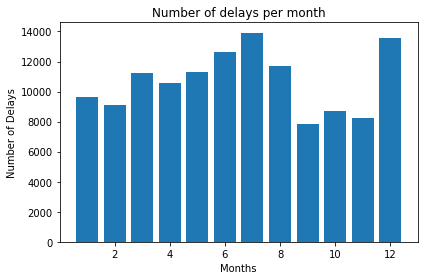

In [11]:
plt.bar(positive_delay_count.month, positive_delay_count.Count)
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per month')
plt.tight_layout()
plt.show()

We can see that the biggest number of delays occurs in December and gradually grows from April to July. Probably they happen because of greater number of holidays in this months so we can give an advice to the airlines to increase the number of employees in the shift in these months.

# 2

The next reasonable idea is to check the most delayed day of the week but probably we won't obtain any clear information.

In [14]:
positive_delay_count=pd.DataFrame(positive_delay.groupby([positive_delay.day%7])['dep_delay'].size().reset_index(name='Count'))
print(positive_delay_count)


   day  Count
0    0  16486
1    1  21251
2    2  20429
3    3  20019
4    4  17549
5    5  16440
6    6  16258


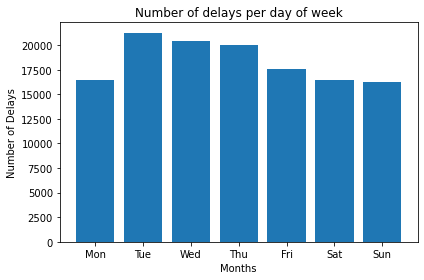

In [30]:
plt.bar(positive_delay_count.day, positive_delay_count.Count)
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per day of week')
plt.tight_layout()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

I've found that the first day of January 2013 was Tuesday. So the first day of the table is Tuesday. We can see that the biggest number of delays happens on Tuesdays so we can also give an advice to the airlines to increase the number of employees in the shifts on Tuesdays.

# 3 

The next reasonable idea is to consider the delays during a single day, but this time we will look on the median value of this data.

In [39]:
positive_delay_day = pd.DataFrame(positive_delay.groupby(positive_delay.hour)['dep_delay'].mean().reset_index(name='Mean_delay_departure'))
print(positive_delay_day)

    hour  Mean_delay_departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    5.0              6.592391
5    6.0             11.272904
6    7.0             17.932435
7    8.0             19.484653
8    9.0             26.300290
9   10.0             27.960072
10  11.0             31.883025
11  12.0             29.784933
12  13.0             28.628948
13  14.0             29.296095
14  15.0             27.906983
15  16.0             33.224913
16  17.0             35.912961
17  18.0             43.505234
18  19.0             44.520623
19  20.0             54.294921
20  21.0             64.210371
21  22.0             92.465274
22  23.0            125.344743
23  24.0             64.862069


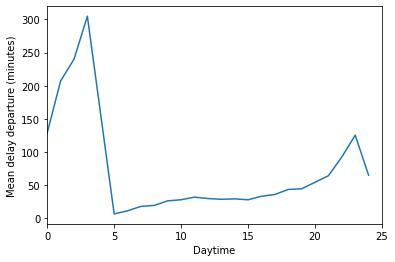

In [33]:
plt.plot(positive_delay_day.hour, positive_delay_day.Mean_delay_departure,'')
plt.xlim(0, 25)
plt.ylabel('Mean delay departure (minutes)')
plt.xlabel('Daytime')

plt.show()

I think from this data advice should be given to the customers but not to the airlines. It is better to have a flight early in the morning just after beginning of the flying day. Further during the day all small delays accumulate and in the evening the mean delay becomes essential. At the same time we should say to the airlines that as small delays accumulate in to big ones probably it is worth it to increase the crew in general in order to avoid the delays.

# 4

To prove my words about "delay accumulation" I suggest to consider the number of flights during the day/night and realize that the delay doesn't happen because of the number of the flights.

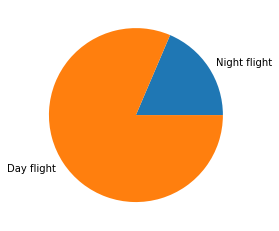

In [52]:
night=flights.loc[(flights['hour']>=22.0) | (flights['hour']<=7.0)]
day=flights.loc[(flights['hour']<22.0) & (flights['hour']>7.0)]
day_value=day.shape[0]
night_value=night.shape[0]
data = [night_value,day_value]
plt.pie (data,labels=['Night flight','Day flight'])

plt.show()

# 5

This would be the last argument to prove my words about delay accumulation. I would show the percentage of delayed flights during the day.

In [73]:
positive_delay_day = pd.DataFrame(positive_delay.groupby(positive_delay.hour)['dep_delay'].size().reset_index(name='positive_delay_departure'))
total_delay_day = pd.DataFrame(flights.groupby(flights.hour)['dep_delay'].size().reset_index(name='total_departure'))

In [107]:
#print(positive_delay_day)
#print(total_delay_day)
merged = pd.merge(positive_delay_day,total_delay_day,on='hour',how='outer')
#print(merged)
#print(positive_delay_day['positive_delay_departure']/(total_delay_day['total_departure']))*100


In [98]:
merged = merged.fillna(0)

In [99]:
merged = merged.sort_values(by = 'hour')

In [106]:
ratio = merged['positive_delay_departure']/merged['total_departure']*100
#print(merged)

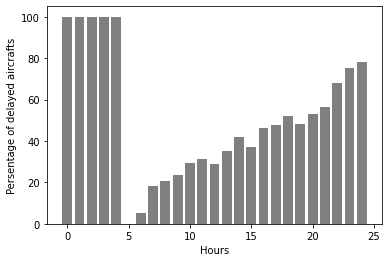

In [109]:
plt.bar(merged.hour, ratio, color='grey')
plt.ylabel('Persentage of delayed aircrafts')
plt.xlabel('Hours')
plt.show()

And again we can see that the number of delayed aircrafts increases during the day, and the lowest point is at the beginning of the flying day. The advise is the same as at the previous point.

# 6

In my opinion the next important aspect to be checked is the connection between visibility and delays.

In [110]:
merged_table = pd.merge(flights,weather, on=['origin','day','month','hour'])


In [111]:
merged_table = merged_table[merged_table.dep_delay>0]

In [139]:
#merged_table.head()

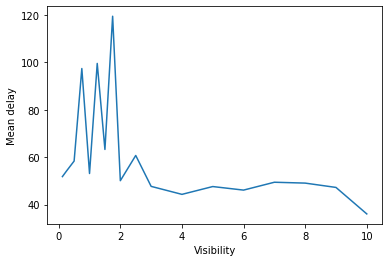

In [196]:
plt.plot(merged_table.groupby('visib')['dep_delay'].mean())
plt.xlabel('Visibility')
plt.ylabel('Mean delay')
plt.show()

The graph shows us that better visibility provides smaller delays

# 7

With my next step I also want to justify the airlines a little bit and show that some delays are connected to the wind level.

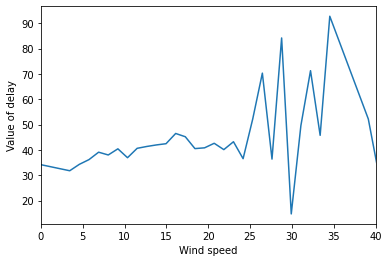

In [185]:
from scipy.signal import savgol_filter
#print(merged_table.groupby('temp')['dep_delay'].size())
#y = savgol_filter(merged_table.groupby('temp')['dep_delay'].size(),40,3)
plt.plot(merged_table.groupby('wind_speed')['dep_delay'].mean())
plt.xlabel('Wind speed')
plt.ylabel('Value of delay')
plt.xlim(0,40)
plt.show()

We can see that the mean time of a delay sharply increases when the wind spead reaches 25. It lets us understand that sometimes flights are delayed because weather conditions but not because of the airlines.

# 8

Now lets check the temperature.

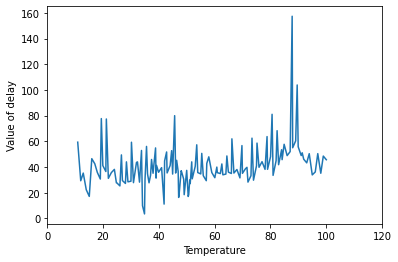

In [193]:
from scipy.signal import savgol_filter
#print(merged_table.groupby('temp')['dep_delay'].size())
#y = savgol_filter(merged_table.groupby('temp')['dep_delay'].size(),40,3)
plt.plot(merged_table.groupby('temp')['dep_delay'].mean())
plt.xlabel('Temperature')
plt.ylabel('Value of delay')
plt.xlim(0,120)
plt.show()

This graph shows that delays are not connected to the temperature

# 9 10

Lets now check which company has the biggest number of delays and biggest mean delay.

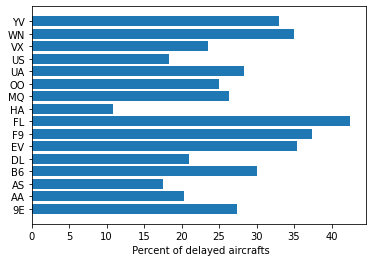

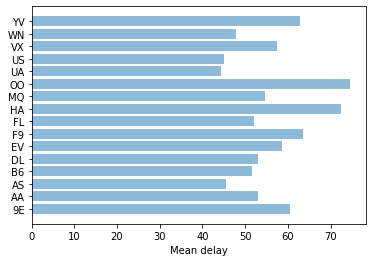

In [221]:
filtered=flights[(flights.dep_delay>0)&(flights.arr_delay>0)]

filtered_dep=pd.DataFrame(filtered.groupby([filtered.carrier])['dep_delay'].size().reset_index(name='Count'))
filtered_arr=pd.DataFrame(filtered.groupby([filtered.carrier])['arr_delay'].mean().reset_index(name='Mean_arr'))
#print(data)
data_dep=pd.DataFrame(flights.groupby([flights.carrier])['dep_delay'].size().reset_index(name='Total_count'))
data_arr=pd.DataFrame(flights.groupby([flights.carrier])['arr_delay'].size().reset_index(name='Total_count'))

data_merged_dep = pd.merge(filtered_dep,data_dep, on=['carrier'])
data_merged_arr = pd.merge(filtered_arr,data_arr, on=['carrier'])

data_merged_dep['Persentage_of_delayed_aircrafts']=(data_merged_dep.Count/data_merged_dep.Total_count)*100

objects = data_merged_dep.carrier
plt.barh(data_merged_dep.carrier, data_merged_dep.Persentage_of_delayed_aircrafts, align='center', alpha=1.0)
plt.yticks(data_merged_dep.carrier, objects)
plt.xlabel(' Percent of delayed aircrafts')

plt.show()
#print(data_merged_arr)
objects = data_merged_arr.carrier
plt.barh(data_merged_arr.carrier, filtered_arr.Mean_arr, align='center', alpha=0.5)
plt.yticks(data_merged_arr.carrier, objects)
plt.xlabel('Mean delay')

plt.show()

From this data customers can obtain for example that HA has a delay on only about 11% of their flights when FL have more than 40%